## Section 3.5

# Exercise 3.23

In [13]:
#Inputs

S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
rg <- seq(-0.02,0.10,0.02)

#Compute BS
a <- (log(1+rg)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
V0 <- ((1+rg)*exp(-r*T)*pnorm(a)-pnorm(a-sigma*sqrt(T)))*S0

#output
V0

[1] 0.07449881 0.08393030 0.09398094 0.10463648 0.11587968 0.12769075 0.14004785

# Exercise 3.24

In [29]:
#inputs
S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
rg <- 0.04

m1 <- 1e4
m2 <- 1e5
m3 <- 1e6

#calculate returns
eps_1 <- rnorm(m1) 
R_1 <- exp(r*T-0.5*sigma^2*T+sigma*sqrt(T)*eps_1)-1

eps_2 <- rnorm(m2) 
R_2 <- exp(r*T-0.5*sigma^2*T+sigma*sqrt(T)*eps_2)-1

eps_3 <- rnorm(m3) 
R_3 <- exp(r*T-0.5*sigma^2*T+sigma*sqrt(T)*eps_3)-1
X1 <- pmax(rg-R_1[1:m1],0)
X2 <- pmax(rg-R_2[1:m2],0)
X3 <- pmax(rg-R_3[1:m3],0)

#calculate BS
v01 <- exp(-r*T)*mean(X1)*S0
v02 <- exp(-r*T)*mean(X2)*S0
v03 <- exp(-r*T)*mean(X3)*S0
c(v01,v02,v03)

[1] 0.1036935 0.1049568 0.1047509

# Excerise 3.25
On the blackboard


# Exercise 3.27

[1] 0.10613

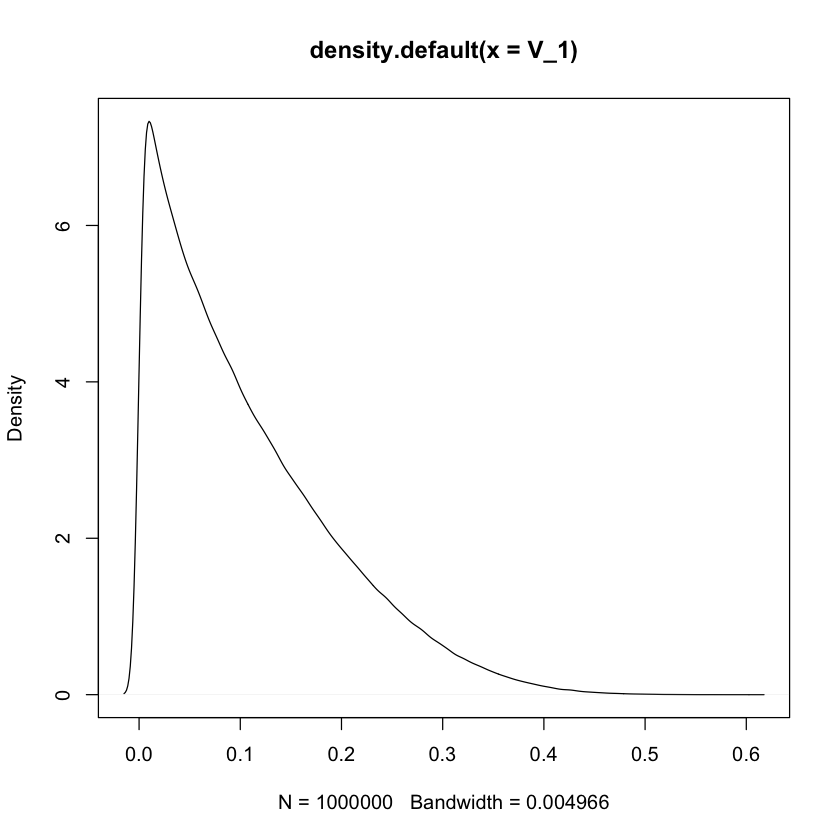

In [30]:
#inputs
S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
T_1<-0.5
rg <- 0.04

m <- 1e6

#calculate returns
eps <- rnorm(m) 
R_1<- exp(r*T_1-0.5*sigma^2*T_1+sigma*sqrt(T_1)*eps)-1
S_1<-S0*(1+R_1)
r_g1<-(1+rg)*S0/S_1-1

#calculate BS
a_1<- (log(1+r_g1)-r*(T-T_1)+0.5*sigma^2*(T-T_1))/(sigma*sqrt(T-T_1))
V_1 <- ((1+r_g1)*exp(-r*(T-T_1))*pnorm(a_1)-pnorm(a_1-sigma*sqrt(T-T_1)))*S_1


plot(density(V_1))

mean(V_1)

# Exercise 3.28

On the blackboard

# Exercise 3.29

In [24]:
#inputs
S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
rg <- 0.04
rc <- c(0.09,0.12,0.15,0.5)

#calc BS
ag <- (log(1+rg)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
ac <- (log(1+rc)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
v_0 <- ((1+rg)*exp(-r*T)*pnorm(ag)-pnorm(ag-sigma*sqrt(T)))*S0-
    ((1+rc)*exp(-r*T)*pnorm(ac)-pnorm(ac-sigma*sqrt(T)))*S0-(1-exp(-r*T)*(1+rc))*S0
v_0

[1] 0.02861964 0.03860797 0.04747631 0.09588376

## Exercise - Greeks

Greeks are derivatives of the value of an option with respect to the parameters of the B-S-model. Assume a put option with strike K=1.04, r=0.03, T=1 and sigma=0.25. Approximate the derivative of $V_0$ with respect to $S_0$, r, $\sigma$ and T.

In [20]:
#inputs
S0 <- 1
sigma <- 0.25
r <- 0.03
T <- 1
K <- 1.04

S0_h <- 1.01
sigma_h <- 0.26
r_h <- 0.04
T_h <- 1.01

#Compute BS
a <- (log(K/S0)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
V0 <- K*exp(-r*T)*pnorm(a)-S0*pnorm(a-sigma*sqrt(T))
print(paste("V0 is",V0))

#Compute BS for S0_h
a_h <- (log(K/S0_h)-r*T+0.5*sigma^2*T)/(sigma*sqrt(T))
V0_h <- K*exp(-r*T)*pnorm(a_h)-S0_h*pnorm(a_h-sigma*sqrt(T))
print(paste("New V0 is",V0_h))
print(paste("Delta is",(V0_h-V0)/0.01))


      

[1] "V0 is 0.104636482894199"
[1] "New V0 is 0.100066677682884"
[1] "Delta is -0.456980521131506"


In [21]:
print(paste("V0 is",V0))

#Compute BS for r_h
a_h <- (log(K/S0)-r_h*T+0.5*sigma^2*T)/(sigma*sqrt(T))
V0_h <- K*exp(-r_h*T)*pnorm(a_h)-S0*pnorm(a_h-sigma*sqrt(T))
print(paste("New V0 is",V0_h))
print(paste("Rho is",(V0_h-V0)/0.01))

[1] "V0 is 0.104636482894199"
[1] "New V0 is 0.0990486933611043"
[1] "Rho is -0.55877895330948"


In [22]:
print(paste("V0 is",V0))

#Compute BS for sigma
a_h <- (log(K/S0)-r*T+0.5*sigma_h^2*T)/(sigma_h*sqrt(T))
V0_h <- K*exp(-r*T)*pnorm(a)-S0*pnorm(a_h-sigma_h*sqrt(T))
print(paste("New V0 is",V0_h))
print(paste("Vega is",(V0_h-V0)/0.01))

[1] "V0 is 0.104636482894199"
[1] "New V0 is 0.107186461712859"
[1] "Vega is 0.254997881866009"


In [23]:
print(paste("V0 is",V0))

#Compute BS for T
a_h <- (log(K/S0)-r*T_h+0.5*sigma^2*T_h)/(sigma*sqrt(T_h))
V0_h <- K*exp(-r*T_h)*pnorm(a)-S0*pnorm(a_h-sigma*sqrt(T_h))
print(paste("New V0 is",V0_h))
print(paste("Theta is",(V0_h-V0)/0.01))

[1] "V0 is 0.104636482894199"
[1] "New V0 is 0.105260583971674"
[1] "Theta is 0.0624101077475181"
